<a href="https://colab.research.google.com/github/sonu6084/SHALA2020/blob/master/6.Assignment_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [0]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/sonu6084/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [0]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data.drop('Cabin',inplace=True,axis=1)
titanic_data.dropna(axis=0,inplace=True)

In [0]:
print(titanic_data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


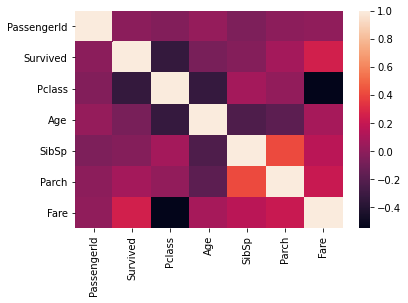

In [0]:
sns.heatmap(titanic_data.corr())

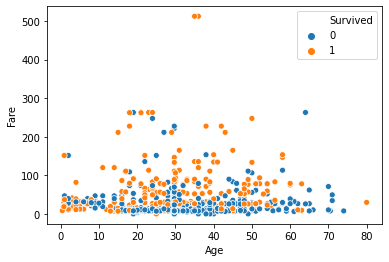

In [0]:
sns.scatterplot(titanic_data.Age,titanic_data.Fare,hue=titanic_data.Survived)

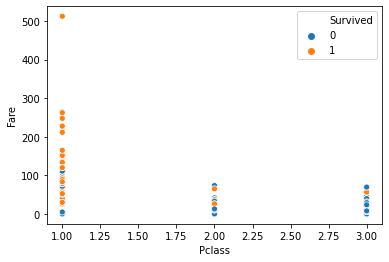

In [0]:
sns.scatterplot(titanic_data.Pclass,titanic_data.Fare,hue=titanic_data.Survived)

In [0]:
X = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']

In [0]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
dummy_variables = ['Sex','Embarked']

df = titanic_data['Pclass']

for i in dummy_variables:
  dum = pd.get_dummies(titanic_data[i],drop_first=True)
  df = pd.concat([df,dum],axis=1)
  X.drop(labels=[i],axis=1,inplace=True)

df.drop(labels='Pclass',axis=1,inplace=True)

In [0]:
X.drop(['Ticket','Name','PassengerId'],axis=1,inplace=True)

In [0]:
X = pd.concat([X,df],axis=1)

In [0]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

print(accuracy_score(y_test,logreg_pred))

0.8314606741573034


In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(accuracy_score(y_test,knn_pred))

0.704119850187266


In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test,rfc_pred))

0.8164794007490637


In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print(accuracy_score(y_test,dtc_pred))

0.7528089887640449


In [0]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print(accuracy_score(y_test,xgb_pred))

0.8426966292134831


In [0]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = dtc)
bag.fit(X_train,y_train)
bag_pred = bag.predict(X_test)

print(accuracy_score(y_test,bag_pred))

0.8202247191011236


In [0]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=1, random_state=34)

ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

print(accuracy_score(y_test,ada_pred))

0.8127340823970037


In [0]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', logreg),
('K Nearest Neighbours', knn),
('Decision Tree', dtc),
('Random forest',rfc),
('Bagging Classifier',bag),
('AdaBoost Classifier',ada)]

vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
vc_pred = vc.predict(X_test)

print("\nVoting classifier: ", round(accuracy_score(y_test, vc_pred),3))


Voting classifier:  0.85


In [0]:
#confusion matrices

print("\nLogistic Regression\n",confusion_matrix(y_test,logreg_pred))
print("\nKNN\n",confusion_matrix(y_test,knn_pred))
print("\nDecision Tree\n",confusion_matrix(y_test,dtc_pred))
print("\nRandom Forest\n",confusion_matrix(y_test,rfc_pred))
print("\nVoting Classifier\n",confusion_matrix(y_test,vc_pred))
print("\nBagging Classifier\n",confusion_matrix(y_test,bag_pred))
print("\nAdaBoost Classifier\n",confusion_matrix(y_test,ada_pred))
print("\nXGBoost Classifier\n",confusion_matrix(y_test,xgb_pred))


Logistic Regression
 [[144  22]
 [ 23  78]]

KNN
 [[129  37]
 [ 42  59]]

Decision Tree
 [[127  39]
 [ 27  74]]

Random Forest
 [[145  21]
 [ 27  74]]

Voting Classifier
 [[154  12]
 [ 29  72]]

Bagging Classifier
 [[140  26]
 [ 18  83]]

AdaBoost Classifier
 [[137  29]
 [ 21  80]]


In [0]:
classifiers = [('Logistic Regression', logreg),
('K Nearest Neighbours', knn),
('Decision Tree', dtc),
('Random forest',rfc),
('Bagging Classifier',bag),
('AdaBoost Classifier',ada),
('XGBoost Classifier',xgb_clf)]

for clf_name, clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

print("Voting Classifier : {:.3f} ".format(accuracy_score(y_test,vc_pred)))

Logistic Regression : 0.831
K Nearest Neighbours : 0.704
Decision Tree : 0.753
Random forest : 0.816
Bagging Classifier : 0.820
AdaBoost Classifier : 0.813
Voting Classifier : 0.846 


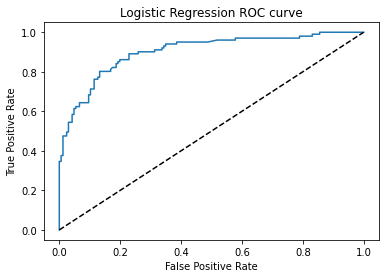

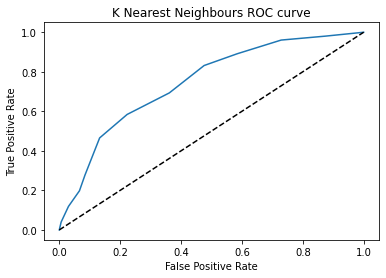

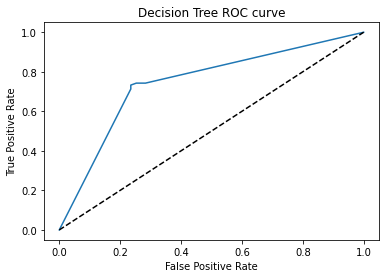

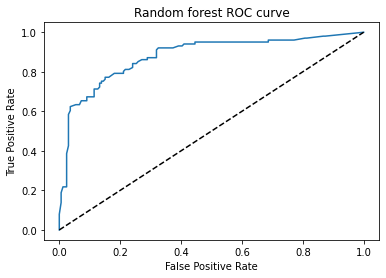

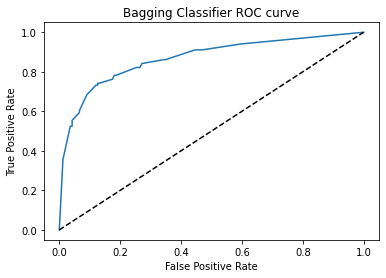

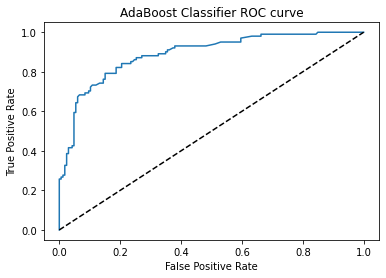

In [0]:
from sklearn.metrics import roc_curve  

def roc_plot(c_name,classifier):
  probs = classifier.predict_proba(X_test)  
  probs = probs[:, 1]  
  fper, tper, thresholds = roc_curve(y_test, probs) 
  plt.plot(fper, tper)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('{} ROC curve'.format(c_name))
  # show the plot
  plt.show()


for clf_name, clf in classifiers:
  roc_plot(clf_name,clf)

In [0]:
'''Ticket Class ,Age ,SibSp , Parch,  Gender, Fare, Embarked'''

inputs = [2,45,3,2,'male',267,'C']

def process_input(user_input):
  if inputs[4].lower() == 'male':
    inputs[4]=0
  else:
    inputs[4]=1

  if inputs[6].lower == 'c':
    inputs[6]=0
    inputs.append(0)
  elif inputs[6].lower == 'q':
    inputs[6]=1
    inputs.append(0)
  else:
    inputs[6]=0
    inputs.append(1)  

  output = inputs
  output = np.array(output).reshape(1,-1)
  return output

output = process_input(inputs)
prediction = vc.predict(output)
# prob = vc.predict_proba(output)
print(prediction)

[0]


In [0]:
import pickle
pickle.dump(logreg,open('titanic.sav','wb'))

In [0]:
print(y_test)

387    1
259    1
771    0
208    1
683    0
      ..
248    1
601    0
240    0
468    0
93     0
Name: Survived, Length: 267, dtype: int64


In [0]:
print(logreg_pred)

[1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0]
